In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


In [20]:
df=pd.read_csv('StudentsPerformance.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [27]:
print("categories in 'gender' variable: ",end="")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable: ",end="")
print(df['parental level of education'].unique())

print("categories in 'test preparation course' variable: ",end="")
print(df['test preparation course'].unique())

categories in 'gender' variable: ['female' 'male']
categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'test preparation course' variable: ['none' 'completed']


In [28]:
####features

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [29]:
print('we have {} numerical_features : {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical_features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical_features : ['math score', 'reading score', 'writing score']
we have 5 categorical_features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [30]:
###new features

df['total_score']=df['math score']+df['reading score']+df['writing score']
df['avg_marks']=df['total_score']/3


In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full=df[df['reading score']==100]['avg_marks'].count()
writing_full=df[df['writing score']==100]['avg_marks'].count()
math_full=df[df['math score']==100]['avg_marks'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')


Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [34]:
less_reading_30=df[df['reading score']<=30]['avg_marks'].count()
less_writing_30=df[df['writing score']<=30]['avg_marks'].count()
less_math_30=df[df['math score']<=30]['avg_marks'].count()

print(f'Number of students with less than passing marks in math: {less_math_30}')
print(f'Number of students with less than passing marks reading: {less_reading_30}')
print(f'Number of students with less than passing marks in writing: {less_writing_30}')

Number of students with less than passing marks in math: 16
Number of students with less than passing marks reading: 8
Number of students with less than passing marks in writing: 10


In [36]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   avg_marks                    1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


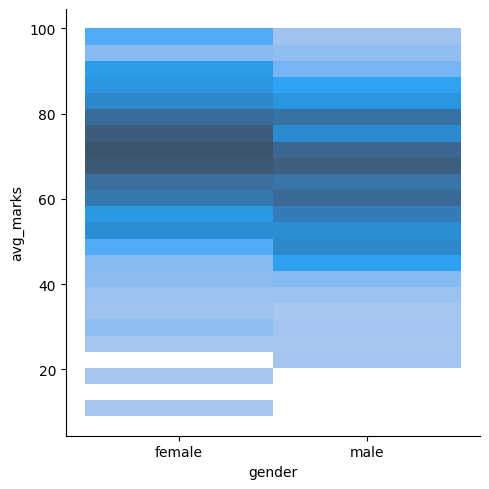

In [42]:
sns.displot(data=df, x="gender", y="avg_marks")

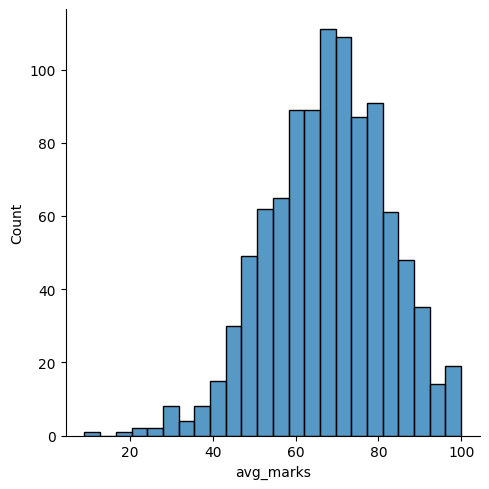

In [43]:
sns.displot(data=df, x="avg_marks")